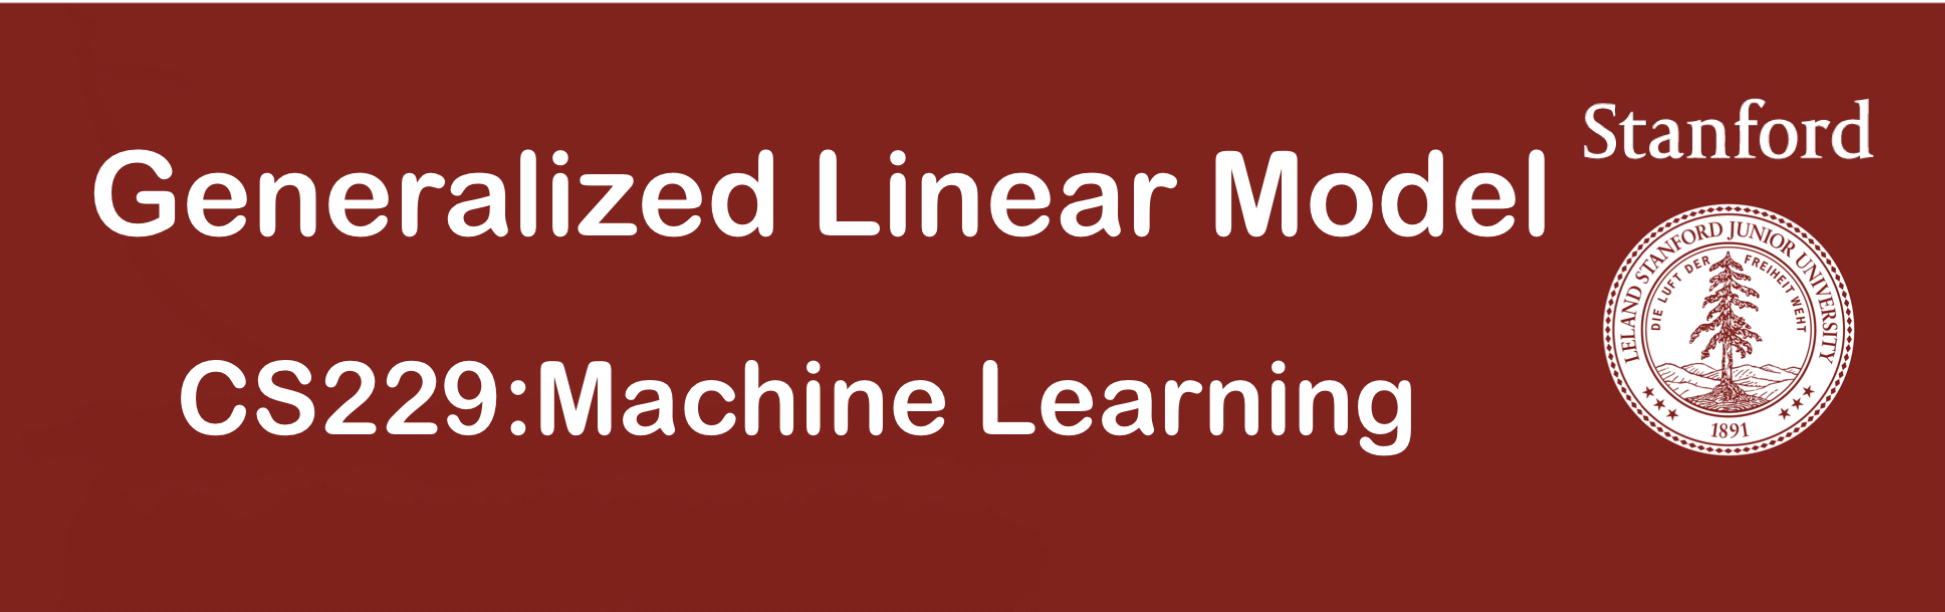

在前两章我们分别介绍了线性回归与逻辑回归，其分别符合不同的概率分布：

* 线性回归问题符合正态分布 $y|x;\theta \sim \mathcal{N}(\mu,\sigma^2)$

* 逻辑回归问题符合伯努利分布 $y|x;\theta \sim \text{Bernoulli}(\phi)$

实际上这些模型都是一个更为广泛的模型族的特例，这个模型族被称为 **「广义线性模型(GLM-Generalized Linear Model)」**。

### 1 指数分布

为了引出广义线性模型，我们首先需要介绍 **「指数族分布(exponential family distribution)」**：

如果一个分布可以被表示成如下形式，我们就称其属于指数分布族：

$$p(y;\eta)=b(y)exp(\eta^T T(y)-a(\eta)) $$

* $\eta$ 被称为分布的 **「自然参数(natural parameter)」**（或者称为 **「典范参数(canonical parameter)」**）

* $T(y)$ 被称为 **「充分统计量(sufficient statistic)」**，通常 $T(y)=y$

* $a(\eta)$ 被称为 **「对数分割函数(log partition function)」**

* $e^{-a(\eta)}$ 本质上是一个 **「归一化常数(normalization constant)」**，确保概率 $p(y;\eta)$和为1

当选定$T,a,b$时，我们得到了一种以 $\eta$ 为参数的分布。下面我们来证明 **「伯努利分布(Bernoulli distribution)」** 和 **「高斯分布(Gaussian distribution)」** 属于指数族分布。

#### 1.1 伯努利分布的证明

伯努利分布可以表示为：

![Screen Shot 2021-11-19 at 3.37.44 PM.png](attachment:7c0b0915-a44e-4884-8408-72f06c1767d0.png)

自然参数 $\eta=log(\frac{\phi}{1-\phi})$ ,这里自然参数不是向量，所以他的转置不变。而从该式可以导出 $\phi=\frac{1}{1+e^{-\phi}}$ ,这正是我们熟悉的 sigmoid 函数！之后我们推导逻辑回归是广义线性模型时会再提到这个。

现在，我们可以得到：

$$T(y)=y$$

$$a(\eta)=-log(1-\phi)=log(1+e^{\eta})$$

$$b(y)=1$$

这表明通过设定适当的 $T,a,b$ ，伯努利分布可以写成等式 (1) 的形式，即其属于指数族分布。

#### 1.2 正态分布的证明

之前我们推导线性回归时得出了 $\sigma$ 的值对 $\theta$ 的选择没有影响，所以为了简化推导，这里设定 $\sigma^2 = 1$ ，于是我们有：

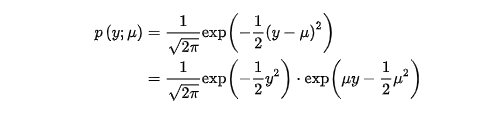

因此，通过如下选择，我们可以证明高斯分布属于指数族分布：

$$\eta = \mu$$

$$T(y)=y$$

$$a(\eta)=\frac{\mu^2}{2}=\eta^2$$

$$b(y)=(1/\sqrt{2 \pi})exp(-y^2 / 2)$$

其实，还有许多其他的分布属于指数族，比如多项式分布、泊松分布、伽马分布等.

### 2 构建广义线性模型

首先，广义线性模型的构建需要基于以下三条假设：

1. $y|x;\theta$ 符合以 $\eta$ 为参数的指数族分布

2. 给定 $x$， 我们的目标是预测 $T(y)$ 的理想值，而大多数的案例中，$T(y)=y$
    
- 这意味着我们的假设 $h$ 应该满足 $h(x)=E[y|x]$ （可以从期望的定义上来进行理解，即反映随机变量平均取值的大小）

3. 自然参数 $\eta$ 和输入 $x$ 满足线性关系 $\eta=\theta^T x$ (如果 $\eta$ 是向量，那么 $\eta_i = \theta_i^T x$

基于上面三条假设，我们就可以利用广义线性模型来优雅地解决问题。下面，我们将用广义线性模型来推导 **「线性回归」** 和 **「逻辑回归」** 的假设函数，并引出 **「softmax 回归」**。

#### 2.1 线性回归

线性回归的目标变量（在GLM术语中也称为 **「反应变量(response variable)」** ）满足「高斯分布」：$y|x;\theta \sim \mathcal{N}(\mu, \sigma^2)$。根据之前推导的结果，我们有：

$$h_{\theta}=E[y|x;\theta]=\mu=\eta=\theta^T x$$

第一个等式来源于假设 2；第二个等式是高斯分布的性质；第三个等式是之前推导过高斯分布属于指数族分布的条件；最后一个等式则来源于假设 3。

#### 2.2 逻辑回归

逻辑回归的反应变量满足 **「伯努利分布」**：$y|x;\theta \sim \text{Bernoulli}(\phi)$。之前我们证明伯努利分布属于指数族分布时已经推导出了 $\phi = \frac{1}{1+e^{-\eta}}$, 因此，与线性回归类似，我们有：

$$h_{\theta}=E[y|x;\theta] = 1 \times p(y=1|x;\theta) + 0 \times p(y=0|x;\theta) $$ 

由伯努利分布定义，$p(y=1|x;\theta)=\phi$

所以有：

$$h_{\theta}=E[y|x;\theta] = 1 \times p(y=1|x;\theta) + 0 \times p(y=0|x;\theta) =\phi=\frac{1}{1+e^{-\eta}}= \frac{1}{1+e^{-\theta^T x}}$$ 

上式证明了为什么逻辑回归的假设函数是 sigmod 函数，当反应变量满足伯努利分布时，这是广义线性模型的定义导出的结果。

此外，我们将表示分布均值（期望）与自然参数 $\eta$ 关系的函数 $g(\eta)=E[T(y);\eta]$ 称为 **「正则响应函数(canonical response function)」**，将其反函数称为 **「正则关联函数(canonical link function)」**。因此，高斯分布的正则响应函数即为其本身，伯努利分布的正则响应函数即为逻辑函数。

#### 2.3 softmax回归

如果对于分类问题，$y$ 可以取 $k$ 个值 $(k>2)$，那么这就是一个 **「多元分类」** 问题。此时反应变量的条件概率分布模型为「多项分布」。下面让我们推导出多项分布数据的广义线性模型。

在这之前，需要首先将多项式分布表示为指数族分布。假设多项式分布有 $k$ 个输出，一般我们应该定义 $k$ 个参数 $\phi_1,...\phi_k$ 来表示每个输出的概率，但这其实存在冗余，因为第 $k$ 个输出的概率可以用其他 $k-1$ 个输出的概率来表示（概率之和必定为 1 ）。因此，我们只定义 $k-1$ 个参数 $\phi_1,...,\phi_{k-1}$ ，其中 $\phi_i =p(y=i;\phi)$，则 $\phi_k = 1-\sum_{i=1}^{k-1} \phi_i$，注意其并不是一个参数，而是由 $\phi_1,...,\phi_{k-1}$ 确定的。

为了将多项分布表示为指数族分布，我们首先定义 $T(y) \in \mathbb R^{k-1}$ 如下：

$$
 T(1)=\begin{bmatrix}
   1 \\
   0 \\
   0 \\
   \vdots \\
   0
  \end{bmatrix}, T(2)=\begin{bmatrix}
   0 \\
   1 \\
   0 \\
   \vdots \\
   0
  \end{bmatrix},\cdots,
   T(k)=\begin{bmatrix}
   0 \\
   0 \\
   0 \\
   \vdots \\
   0
  \end{bmatrix}
$$

与之前不同，$T(y)$ 与 $y$ 并不相等，$T(y)$ 是一个 $k-1$ 维的向量而非一个实数。我们将用 $(T(y))_i$ 来表示向量 $T(y)$ 的第 $i$ 个元素。

下面我们将再介绍一个有用的操作符：$1\{\cdot\}$，其运算法则为：$1\{\text{True}\}=1,1\{\text{False}\}=0$

因此，我们可以得到如下等式：

$${(T(y))}_i= 1\{ y=i \} $$

即只有当 $y=i$ 时，第 $i$ 个元素才为1， 其他都为0.

进一步可以得到：

$$E[(T(y))_i]=P(y=i)=\phi_i$$

基于上述结论，我们可以将多项分布表示为指数族分布：

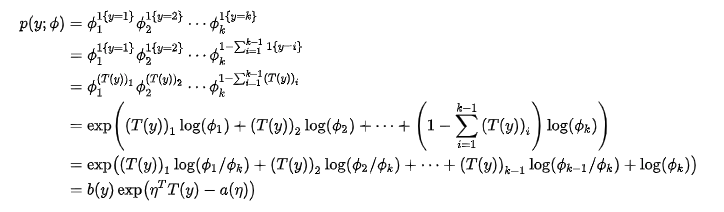

其中：

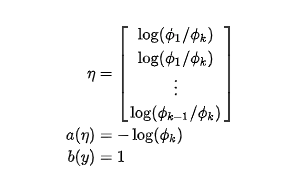

上述推导表明了多项分布属于指数族分布，并得到了「关联函数」如下（前面已经证明了期望值即为 $\phi_i$ ）：

$$\eta_i = log \frac{\phi_i}{\phi_k}$$

下面我们将推导出「响应函数」：

$$e^{\eta_i}=\frac{\phi_i}{\phi_k}$$

$$\phi_k e^{\eta_i} = \phi_i$$

$$\phi_k \sum_{i=1}^k e^{\phi_i} = \sum_{i=1}^k \phi_i = 1$$

这表明 $\phi_k = 1/ \sum_{i=1}^k e^{\eta_i}$ ,将其代回上式，即得到响应函数：

$$\phi_i = \frac{e^{\eta_i}}{\sum_{j=1}^k e^{\eta_i}}$$

这个将 $\eta$ 映射到 $\phi$ 的函数又被称为softmax函数。根据之前的假设3， 我们有 $\eta_i=\theta_i^T x(i=1,...,k-1)$， 其中 $\phi_1,...,\phi_{k-1} \in \mathbb R^{n+1}$

为了方便，我们定义 $\theta_k=0$，这样 $\eta_k = \theta_k^T x=0$ 因此，我们的模型给出 $y$ 的条件分布如下：

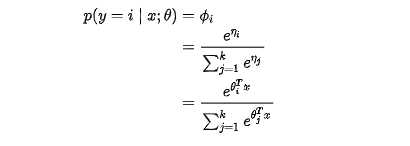

这个模型可以应用于多元分类问题 $y \in \{i,...k\} $被称为 **「softmax 回归」**，它是逻辑回归的推广

综上，我们的假设函数为：

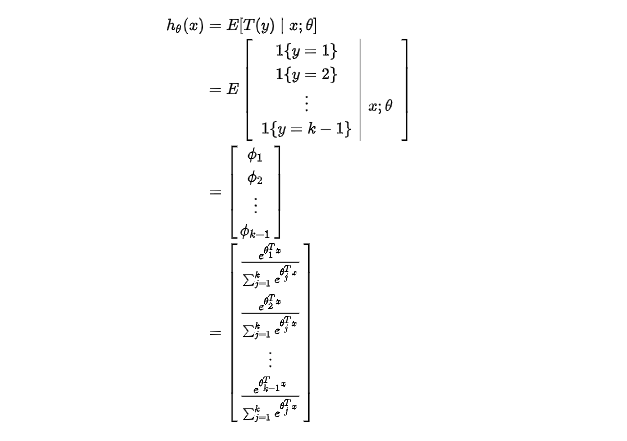

该假设函数给出了 $y$ 取每个可能的值的条件概率 $(i=1,...k)$。其中 $p(y=k|x;\theta)$ 由 $1-\sum_{i=1}^{k-1} \phi_i$ 得到。

最后，我们来讨论 softmax 回归的参数拟合。与之前类似，如果我们有一个训练集 $\{(x^{(i)},y^{(i)});i=1,...,m\}$，希望学习出这个模型的参数 $\theta_i$， 我们首先会给出其对数似然函数：

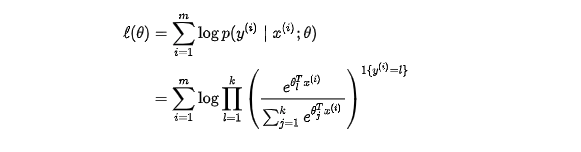

下面我们就可以通过最大似然分析求出参数 $\theta$ ，使用梯度上升或牛顿方法。

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt 
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from math import exp
import time
np.random.seed(1)

# Hyper-parameters
LR = 0.05
DECAY_RATE = 0.005
THETA = np.random.normal(0, 0.5, 3*3).reshape(3, 3)
EPOCH = 20

In [3]:
## 1. Generate four categories data
X, y = make_blobs(n_samples=150, n_features=2, centers=3, random_state=3)  # state 12

In [4]:
X.shape

(150, 2)

In [5]:
y.shape

(150,)

In [6]:
y # y = 0 or 1 or 2  三类

array([0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2,
       1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1,
       0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1,
       1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 0,
       1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1,
       2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0])

In [7]:
# transform y to onehot vector
encoder = OneHotEncoder()

In [8]:
y = encoder.fit_transform(np.reshape(y, (150,1))).toarray()

In [9]:
y.shape

(150, 3)

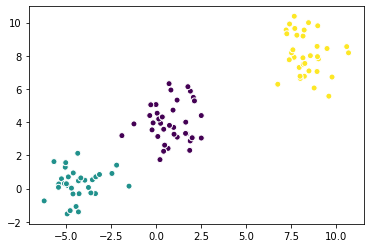

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.argmax(Y_train, axis=1), edgecolors='white')
plt.show()

In [11]:
o_train = np.ones([X_train.shape[0], 1], dtype=X_train.dtype)
o_test = np.ones([X_test.shape[0], 1], dtype=X_test.dtype)
X_train = np.concatenate((o_train, X_train), axis=1)
X_test = np.concatenate((o_test, X_test), axis=1)
print("X_train shape : {0}".format(X_train.shape))
print("Y_train shape : {0}".format(Y_train.shape))
print("X_test shape : {0}".format(X_test.shape))
print("y_test shape : {0}".format(Y_test.shape))

X_train shape : (105, 3)
Y_train shape : (105, 3)
X_test shape : (45, 3)
y_test shape : (45, 3)


In [12]:
X_train[0]

array([ 1.        , -3.53684324,  0.52961248])

In [13]:
X_train[0].shape

(3,)

In [31]:
Y_train[0]

array([0., 1., 0.])

In [14]:
# Make a hypothesis
def hypothesis(x, THETA):
    x = np.reshape(x, (3, 1))
    temp = np.matmul(THETA.T, x) / 100
    denominator = np.sum(temp)
    hypothesis = temp / denominator # normalize into 1
    return hypothesis

# Loss definition
def compute_loss(X, Y, THETA):
    loss = 0
    for x, y in zip(X, Y):
        x = np.reshape(x, (3, 1))
        y = np.reshape(y, (3, 1))
        h_x = hypothesis(x, THETA)
        label = np.argmax(y, axis=0) # the category of prediction
        loss += (-np.log(h_x[label][0] + 0.0000001))  # loss = -y * log(p)
    return loss

# Parameters updating
def update_parameters(THETA, x, y):
    x = np.reshape(x, (3, 1))
    y = np.reshape(y, (3, 1))
    h_x = hypothesis(x, THETA)
    label = np.argmax(y, axis=0)
    # θk := θk - （-yk * (1/pk) * x)  k --> the class, yk and pk are real number, x is a vector ???
    THETA[:, label] = THETA[:, label] - LR * (-y[label][0] * 1/h_x[label][0] * x)
    return THETA

In [15]:
# for plotting
H_train = np.zeros((Y_train.shape[0], Y_train.shape[1]))
H_train.shape

(105, 3)

In [ ]:
H_test = np.zeros((Y_test.shape[0], Y_test.shape[1]))
H_test.shape

In [ ]:
import ipdb
plt.figure(0)
for epoch in range(EPOCH):
    # learning rate decay
    LR = LR * (1 / (1 + DECAY_RATE * epoch))
    i = 0 
    for x, y in zip(X_train, Y_train):
        # shape of x = (1, 3)
        # shape of y = (1, 3)
        # hence we should transpose it.
        loss = compute_loss(X_train, Y_train, THETA)
        print('[{0}/{1}] loss is: {2}'.format(epoch+1, EPOCH, loss[0]))
        H_train[i] = hypothesis(x, THETA).T   #(3,)
        THETA = update_parameters(THETA, x, y)
        plt.scatter(X_train[:,1], X_train[:, 2], c=np.argmax(H_train, axis=1), edgecolors='white', marker='s')
        plt.pause(0.001)
        i += 1
plt.show()

In [ ]:
# test
i = 0
for x, y in zip(X_test, Y_test):
    H_test[i] = hypothesis(x, THETA).T
    i+=1
    plt.scatter(X_test[:, 1], X_test[:, 2], c=np.argmax(H_test, axis=1), edgecolors='white', marker='s')
    plt.show()